In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import seaborn as sns

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= 'Malgun Gothic')
import warnings
warnings.filterwarnings('ignore')

## [채무 상환 데이터]
대출자의 채무 상환 여부를 예측하기 위한 서포트 벡터 머신 분석을 실시하고 결과를 해석하시오.

### 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
#JOB 변수의 결측치는 other 로 대체
df_raw['JOB'].fillna('Other', inplace = True) #fillna 함수 적용 후 df_raw 데이터에 저장 : inplace = True

#숫자형 변수의 결측치는 평균값 입력
df_raw.fillna(df_raw.mean(), inplace=True)

In [8]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [9]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


### 2. 모델 생성

In [11]:
#default parameter
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set:{:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.927
Accuracy on test set:0.890


In [12]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
#이웃 수 증가에 다른 정확도 변화

train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.868
1,2,0.937,0.892
2,3,0.936,0.890
3,4,0.926,0.891
4,5,0.927,0.890
5,6,0.923,0.886
6,7,0.923,0.886
7,8,0.921,0.886
8,9,0.920,0.886
9,10,0.920,0.887


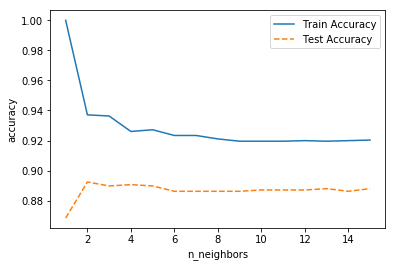

In [17]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_neighbors')
plt.legend()

In [19]:
#가중치별 이웃 수 증가에 따른 정확도 변화

train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (['uniform']) * 10 + (['distance'] * 10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.868
1,2,uniform,0.937,0.892
2,3,uniform,0.936,0.890
3,4,uniform,0.926,0.891
4,5,uniform,0.927,0.890
5,6,uniform,0.923,0.886
6,7,uniform,0.923,0.886
7,8,uniform,0.921,0.886
8,9,uniform,0.920,0.886
9,10,uniform,0.920,0.887


In [20]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index='Neighbors', columns='Weights',
                                                     values=['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.868444  0.868444
2                   1.0  0.937095     0.868444  0.892444
3                   1.0  0.936332     0.889778  0.889778
4                   1.0  0.926039     0.889778  0.890667
5                   1.0  0.927183     0.892444  0.889778
6                   1.0  0.923370     0.891556  0.886222
7                   1.0  0.923370     0.890667  0.886222
8                   1.0  0.921083     0.890667  0.886222
9                   1.0  0.919558     0.890667  0.886222
10                  1.0  0.919558     0.889778  0.887111

In [21]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.868444,0.868444
2,1.0,0.937095,0.868444,0.892444
3,1.0,0.936332,0.889778,0.889778
4,1.0,0.926039,0.889778,0.890667
5,1.0,0.927183,0.892444,0.889778


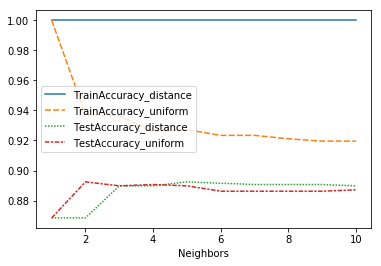

In [24]:
sns.lineplot(data = df_accuracy_weights_pivot)

가중치가 distance일 경우 train data 정확도는 1

In [26]:
#임의로 지정
weights = 'uniform'

In [28]:
#거리 계산 방법별 이웃 수 증가에 따른 정확도 변화
train_accuracy =[]; test_accuracy =[]

para_n_neighbors = [i for i in range(1,11)] * 3

para_metric = ['minkowski'] * 10 + ['euclidean'] * 10  + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.868
1,2,minkowski,0.937,0.892
2,3,minkowski,0.936,0.890
3,4,minkowski,0.926,0.891
4,5,minkowski,0.927,0.890
5,6,minkowski,0.923,0.886
6,7,minkowski,0.923,0.886
7,8,minkowski,0.921,0.886
8,9,minkowski,0.920,0.886
9,10,minkowski,0.920,0.887


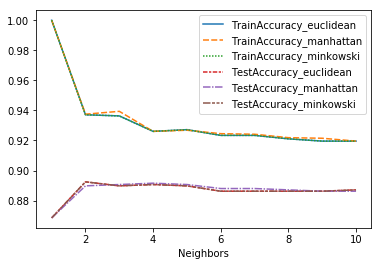

In [30]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index='Neighbors', columns='Metric',
                                                   values=['TrainAccuracy', 'TestAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

### 결론 도출

In [31]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set:{0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:0.926
Accuracy on test set:0.891
Confusion matrix:
[[997   0]
 [123   5]]


* 예측 정확도 0.914
* 이웃 수 : 4
* 가중치 : 균일
* 거리 계산 차이 없음



## [실습] 통신회사의 고객 이탈 데이터
통신회사의 고객 이탈 여부를 예측하기 위한 근접이웃분석을 실시하고 결과를 해석하시오.

### 1. 데이터 구성하기

In [32]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [33]:
df_raw.isnull().sum()

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [34]:
#명목형 변수 목록
obj_cols = df_raw.select_dtypes('object').columns
for col in obj_cols :
    _n = len(df_raw[col].value_counts())
    print(col, ":", str(_n))

CHURN : 2
CUSTOMER_ID : 930
GENDER : 2
CHARGE_TYPE : 5
HANDSET : 11
USAGE_BAND : 6


In [35]:
df_raw['CHURN'] = np.where(df_raw['CHURN'] == 'Active',0,1)
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [36]:
df_raw['CHURN'].value_counts()

0    750
1    180
Name: CHURN, dtype: int64

In [37]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
#목표변수, 설명변수 데이터 지정
df_raw_y = df_raw_dummy['CHURN']
df_raw_x = df_raw_dummy.drop('CHURN',axis=1,inplace=False)

#데이터 분할 (train:test = 7:3)
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,
                                                            test_size=0.3)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (651, 963)
train data Y size : (651,)
test data X size : (279, 963)
test data Y size : (279,)


### 2. 모델 생성

In [40]:
#이웃 수 증가에 따른 정확도 변화

train_accuracy =[]; test_accuracy =[]

para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.710
1,2,0.866,0.806
2,3,0.851,0.778
3,4,0.826,0.796
4,5,0.826,0.781
5,6,0.829,0.803
6,7,0.833,0.785
7,8,0.823,0.796
8,9,0.826,0.785
9,10,0.822,0.792


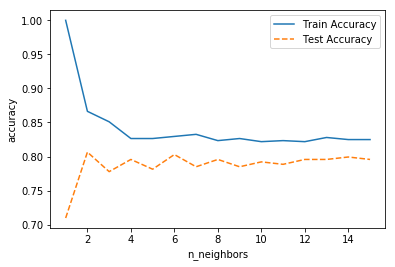

In [41]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy'); plt.xlabel('n_neighbors')
plt.legend()

군집이 1개 일 때 train 데이터의 정확도는 1, 군집이 2개가 되면서 test 데이터의 정확도가 증가한다.

따라서, train/test 데이터의 성능을 고려하여 4를 선택한다.

In [42]:
#가중치별 이웃 수 증가에 따른 정확도 변화

train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 2
para_weights = (['uniform']) * 10 + (['distance'] * 10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.710
1,2,uniform,0.866,0.806
2,3,uniform,0.851,0.778
3,4,uniform,0.826,0.796
4,5,uniform,0.826,0.781
5,6,uniform,0.829,0.803
6,7,uniform,0.833,0.785
7,8,uniform,0.823,0.796
8,9,uniform,0.826,0.785
9,10,uniform,0.822,0.792


In [43]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index='Neighbors', columns='Weights',
                                                     values=['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.709677  0.709677
2                   1.0  0.866359     0.709677  0.806452
3                   1.0  0.850998     0.774194  0.777778
4                   1.0  0.826421     0.777778  0.795699
5                   1.0  0.826421     0.777778  0.781362
6                   1.0  0.829493     0.784946  0.802867
7                   1.0  0.832565     0.777778  0.784946
8                   1.0  0.823349     0.792115  0.795699
9                   1.0  0.826421     0.774194  0.784946
10                  1.0  0.821813     0.788530  0.792115

In [44]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.709677,0.709677
2,1.0,0.866359,0.709677,0.806452
3,1.0,0.850998,0.774194,0.777778
4,1.0,0.826421,0.777778,0.795699
5,1.0,0.826421,0.777778,0.781362


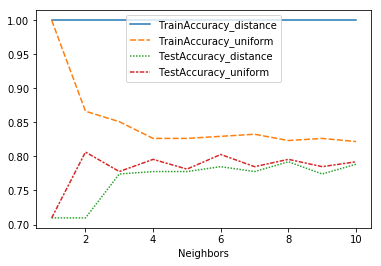

In [45]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [46]:
#임의로 지정
weights = 'uniform'

In [47]:
#거리 계산 방법별 이웃 수 증가에 따른 정확도 변화
train_accuracy =[]; test_accuracy =[]

para_n_neighbors = [i for i in range(1,11)] * 3

para_metric = ['minkowski'] * 10 + ['euclidean'] * 10  + ['manhattan'] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.710
1,2,minkowski,0.866,0.806
2,3,minkowski,0.851,0.778
3,4,minkowski,0.826,0.796
4,5,minkowski,0.826,0.781
5,6,minkowski,0.829,0.803
6,7,minkowski,0.833,0.785
7,8,minkowski,0.823,0.796
8,9,minkowski,0.826,0.785
9,10,minkowski,0.822,0.792


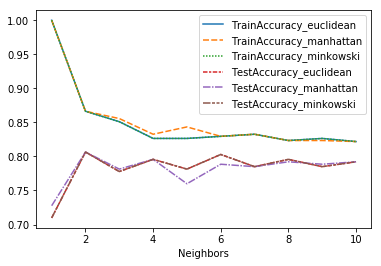

In [49]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index='Neighbors', columns='Metric',
                                                   values=['TrainAccuracy', 'TestAccuracy'])
level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '_' + level1
sns.lineplot(data = df_accuracy_metric_pivot)

### 3. 결론 도출

In [50]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = 'uniform', metric = 'manhattan')
knn_model.fit(df_train_x, df_train_y)

y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set:{0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("Accuracy on test set:{0:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set:0.833
Accuracy on test set:0.796
Confusion matrix:
[[215   8]
 [ 49   7]]


* 예측 정확도 : 0.796
* 이웃 수 : 4
* 가중치 : 균일
* 거리 계산 : manhattan